## Actividad 1 Forkear en GitHub




## Actividad 2 Calentamiento, repaso de listas tuplas y conjuntos


In [17]:
paises = ["País_A", "País_B", "País_C"]
anios = (2018, 2019, 2020, 2021)

paises, anios

(['País_A', 'País_B', 'País_C'], (2018, 2019, 2020, 2021))

In [18]:
paises_repetidos = ["País_A", "País_B", "País_A", "País_C", "País_B"]
paises_unicos = set(paises_repetidos)
paises_unicos


{'País_A', 'País_B', 'País_C'}

In [19]:
pib_ejemplo = {
    "País_A": 500,
    "País_B": 800,
    "País_C": 650
}

print("Diccionario PIB:", pib_ejemplo)
print("PIB de País_B:", pib_ejemplo["País_B"])

# Recorrido rápido
for pais, pib in pib_ejemplo.items():
    print(f"{pais}: PIB = {pib}")

Diccionario PIB: {'País_A': 500, 'País_B': 800, 'País_C': 650}
PIB de País_B: 800
País_A: PIB = 500
País_B: PIB = 800
País_C: PIB = 650


## Actividad 3. Importación de archivos

In [20]:
import pandas as pd

### N2.A3.1 Importación de CSV

In [21]:


#df_csv = pd.read_csv("C:///...datos_pib.csv")      # Ajustamos acorde al nombre según nuestros archivos si estamos en pc con jupyter

df_9paises_csv = pd.read_csv("/content/drive/MyDrive/Curso introducción a Python para Economistas/PLANO_pib_9paises_2020_2022.csv")      # Ajustamos acorde al nombre según nuestros archivos si estamos en pc con jupyter
print("CSV:")
display(df_9paises_csv.head())

CSV:


,pais,anio,area_km2,poblacion,tasa_desempleo,tasa_inactividad,tasa_empleo,poblacion_economicamente_activa,ocupados,desocupados,pib_pc,PIB
0,Pais_A,2020,780353,5981505,13.235278,19.564867,67.199855,4811232,4174452,636780,30066,179840138382
1,Pais_A,2021,780353,6053283,3.807315,23.372010,72.820675,4638509,4461906,176603,23545,142522752400
2,Pais_A,2022,780353,6125061,6.305398,17.510680,76.183922,5052521,4733940,318582,43940,269133977361
3,Pais_B,2020,1903893,14953367,5.765577,23.342451,70.891971,11462885,10801983,660901,31975,478135237927
4,Pais_B,2021,1903893,15132807,5.638589,22.293805,72.067606,11759129,11096080,663049,15816,239341431362


In [47]:
# Plus, para que usen si llegan a tener problemas con algun CSV

#forma robusta con una función

# Use una función que me permite leer con suficiente robustez, sin importar codificaciones y separadores siempre que hayan usado algunso comunes
def leer_csv_robusto(path):
    encodings = ["utf-8-sig", "utf-8", "cp1252", "latin-1"] #codificaciones posibles... ()
    separadores = [",", ";", "\t"]  #separadores comunes que se encuentran en los .csv
    ultimo_error = None
    for enc in encodings:
        for sep in separadores:
            try:
                df = pd.read_csv(path, encoding=enc, sep=sep)
                return df, {"encoding": enc, "sep": sep}
            except Exception as e:
                ultimo_error = e
    raise ultimo_error



In [48]:
ruta = "/content/drive/MyDrive/Curso introducción a Python para Economistas/PLANO_pib_9paises_2020_2022.csv"
df_csv, meta = leer_csv_robusto(ruta)
print("Cargado con:", meta)
print(df_csv.head())

Cargado con: {'encoding': 'utf-8-sig', 'sep': ','}
     pais  anio  area_km2  poblacion  tasa_desempleo  tasa_inactividad  \
0  Pais_A  2020    780353    5981505       13.235278         19.564867   
1  Pais_A  2021    780353    6053283        3.807315         23.372010   
2  Pais_A  2022    780353    6125061        6.305398         17.510680   
3  Pais_B  2020   1903893   14953367        5.765577         23.342451   
4  Pais_B  2021   1903893   15132807        5.638589         22.293805   

   tasa_empleo  poblacion_economicamente_activa  ocupados  desocupados  \
0    67.199855                          4811232   4174452       636780   
1    72.820675                          4638509   4461906       176603   
2    76.183922                          5052521   4733940       318582   
3    70.891971                         11462885  10801983       660901   
4    72.067606                         11759129  11096080       663049   

   pib_pc           PIB  
0   30066  179840138382  
1   235

### N2.A3.2 Importación de **EXCEL**

In [22]:
# import pandas as pd  lo dejo como recordatorio...

df_xls = pd.read_excel("/content/drive/MyDrive/Curso introducción a Python para Economistas/pib_9paises_2020_2022.xlsx")   # Hoja por defecto

print("Excel:")
display(df_xls.head())

Excel:


,pais,anio,area_km2,poblacion,poblacion.1,tasa_desempleo,tasa_inactividad,tasa_empleo,poblacion_economicamente_activa,ocupados,desocupados,pib_pc,PIB,SUDAMERICA
0,Pais_A,2020,780353,5981505,5981505,13.235278,19.564867,67.199855,4811232.0,4174452.0,636780.0,30066,179840138382,True
1,Pais_A,2021,780353,6053283,6053283,3.807315,23.372010,72.820675,4638509.0,4461906.0,176603.0,23545,142522752400,True
2,Pais_A,2022,780353,6125061,6125061,6.305398,17.510680,76.183922,5052521.0,4733940.0,318582.0,43940,269133977361,True
3,Pais_B,2020,1903893,14953367,14953367,5.765577,23.342451,70.891971,11462885.0,10801983.0,660901.0,31975,478135237927,True
4,Pais_B,2021,1903893,15132807,15132807,5.638589,22.293805,72.067606,11759129.0,11096080.0,663049.0,15816,239341431362,True


In [28]:
# A lo largo de las primeras actividades el estudiante trabajará sus imitaciones con esta base de datos
df_xls_std = pd.read_excel("/content/drive/MyDrive/Curso introducción a Python para Economistas/DataFrame_Sesion03_estudiantes.xlsx")   # Hoja por defecto

print("Excel:")
display(df_xls_std.head())

Excel:


,pais,anio,area_km2,poblacion,poblacion.1,tasa_desempleo,tasa_inactividad,tasa_empleo,poblacion_economicamente_activa,ocupados,desocupados,pib_pc,PIB,SUDAMERICA
0,Rojo,2020,764091,5515938,5515938,13.235278,19.564867,67.199855,4436752.0,3849536.0,587216.0,33307,183717775598,True
1,Rojo,2021,843584,6247801,6247801,3.807315,23.372010,72.820675,4787564.0,4605286.0,182278.0,23094,144284041430,True
2,Rojo,2022,846377,6353026,6353026,6.305398,17.510680,76.183922,5240568.0,4910129.0,330439.0,45258,287525835862,True
3,Azul,2020,1990797,15228598,15228598,5.765577,23.342451,70.891971,11673870.0,11000804.0,673066.0,29385,447488915591,True
4,Azul,2021,1825721,14348143,14348143,5.638589,22.293805,72.067606,11149396.0,10520727.0,628669.0,17440,250227417074,True


### N2.A3.3 Importación de **DTA**

¿Cómo quedaria esta parte?

In [24]:
# import pandas as pd  lo dejo como recordatorio...

df_dta = pd.read_stata("datos_pib_panel.dta") # ¿Cómo quedaria esta parte?

df_dta.head()


FileNotFoundError: [Errno 2] No such file or directory: 'datos_pib_panel.dta'

## Actividad Extra

In [53]:
import numpy as np


In [54]:
def get_data_dictionary(data):
    data_dict = pd.DataFrame(columns=['Columna', 'Conteo', 'Valores Unicos', 'Rango', 'Values Nulos', 'Valores posibles'])

    for col in data.columns:
        count = data[col].shape[0]  # Total count of rows
        unique_values = data[col].nunique()  # Number of unique values in the column

        # Defining the range
        if pd.api.types.is_numeric_dtype(data[col]):  # Check if column is numeric
            if unique_values > 1:
                range = f"{data[col].min()} - {data[col].max()}"
        else:
            range = np.nan
        nulls = data[col].isna().sum()

        # Sampling possible values
        values = list(data[col].dropna().sample(frac=0.25, replace=False, random_state=42))
        values = list(set(values))[:5]  # Show only up to 5 unique values for preview
        data_dict.loc[len(data_dict)] = [col,count,unique_values,range,nulls,values]

    return data_dict

In [55]:
#¿Profe cómo lo uso ?

diccionario = get_data_dictionary(df_xls)
print(diccionario)

                            Columna  Conteo  Valores Unicos  \
0                              País      27               9   
1                              year      27               3   
2                          area_km2      27               9   
3                         poblacion      27              27   
4                       poblacion.1      27              27   
5                    tasa_desempleo      27              25   
6                  tasa_inactividad      27              25   
7                       tasa_empleo      27              25   
8   poblacion_economicamente_activa      27              25   
9                          ocupados      27              25   
10                      desocupados      27              25   
11                           pib_pc      27              27   
12                              gdp      27              27   
13                       SUDAMERICA      27               2   

                                    Rango  Values Nulo

In [ ]:
#imitación son su vase de datos...


## Actividad 4. Limpieza y preparación básica de datos

In [29]:
# Normalmente diagnosticamos calidad
df_xls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   pais                             30 non-null     object 
 1   anio                             30 non-null     int64  
 2   area_km2                         30 non-null     int64  
 3   poblacion                        30 non-null     int64  
 4   poblacion.1                      30 non-null     int64  
 5   tasa_desempleo                   28 non-null     float64
 6   tasa_inactividad                 28 non-null     float64
 7   tasa_empleo                      28 non-null     float64
 8   poblacion_economicamente_activa  28 non-null     float64
 9   ocupados                         28 non-null     float64
 10  desocupados                      28 non-null     float64
 11  pib_pc                           30 non-null     int64  
 12  PIB                     

In [ ]:
#imitación son su vase de datos...


In [30]:
# Conteo de valores faltantes por columna
df_xls.isna().sum()


,0
pais,0
anio,0
area_km2,0
poblacion,0
poblacion.1,0
tasa_desempleo,2
tasa_inactividad,2
tasa_empleo,2
poblacion_economicamente_activa,2
ocupados,2


In [ ]:
#imitación son su vase de datos...


In [32]:
# Eliminar filas con PIB faltante
df_xls = df_xls.dropna(subset=["PIB"])
df_xls.isna().sum()


,0
pais,0
anio,0
area_km2,0
poblacion,0
poblacion.1,0
tasa_desempleo,2
tasa_inactividad,2
tasa_empleo,2
poblacion_economicamente_activa,2
ocupados,2


In [ ]:
#imitación son su vase de datos...


In [34]:
# Asegurar tipo numérico en una columna
df_xls["PIB"] = df_xls["PIB"].astype(float)
df_xls.dtypes


,0
pais,object
anio,int64
area_km2,int64
poblacion,int64
poblacion.1,int64
tasa_desempleo,float64
tasa_inactividad,float64
tasa_empleo,float64
poblacion_economicamente_activa,float64
ocupados,float64


In [ ]:
#imitación son su vase de datos...


In [36]:
# Renombrar columnas para que tengan nombres "económicos"
df_xls = df_xls.rename(columns={
    "pais": "País",
    "anio": "year",
    "PIB": "gdp"
})

df_xls.head()


,País,year,area_km2,poblacion,poblacion.1,tasa_desempleo,tasa_inactividad,tasa_empleo,poblacion_economicamente_activa,ocupados,desocupados,pib_pc,gdp,SUDAMERICA
0,Pais_A,2020,780353,5981505,5981505,13.235278,19.564867,67.199855,4811232.0,4174452.0,636780.0,30066,1.798401e+11,True
1,Pais_A,2021,780353,6053283,6053283,3.807315,23.372010,72.820675,4638509.0,4461906.0,176603.0,23545,1.425228e+11,True
2,Pais_A,2022,780353,6125061,6125061,6.305398,17.510680,76.183922,5052521.0,4733940.0,318582.0,43940,2.691340e+11,True
3,Pais_B,2020,1903893,14953367,14953367,5.765577,23.342451,70.891971,11462885.0,10801983.0,660901.0,31975,4.781352e+11,True
4,Pais_B,2021,1903893,15132807,15132807,5.638589,22.293805,72.067606,11759129.0,11096080.0,663049.0,15816,2.393414e+11,True


In [ ]:
#imitación son su vase de datos...


In [37]:
# Asegurar que PIB sea numérico (manejando comas y valores raros)
df_xls["gdp"] = df_xls["gdp"].astype(str).str.replace(",", ".", regex=False)
df_xls["gdp"] = pd.to_numeric(df_xls["gdp"], errors="coerce")

df_xls["gdp"].dtype, df_xls["gdp"].head()


(dtype('float64'),
 0    1.798401e+11
 1    1.425228e+11
 2    2.691340e+11
 3    4.781352e+11
 4    2.393414e+11
 Name: gdp, dtype: float64)

In [39]:
# Eliminar filas duplicadas por país y año
df_xls = df_xls.drop_duplicates(subset=["País", "year"])
df_xls.head()

,País,year,area_km2,poblacion,poblacion.1,tasa_desempleo,tasa_inactividad,tasa_empleo,poblacion_economicamente_activa,ocupados,desocupados,pib_pc,gdp,SUDAMERICA
0,Pais_A,2020,780353,5981505,5981505,13.235278,19.564867,67.199855,4811232.0,4174452.0,636780.0,30066,1.798401e+11,True
1,Pais_A,2021,780353,6053283,6053283,3.807315,23.372010,72.820675,4638509.0,4461906.0,176603.0,23545,1.425228e+11,True
2,Pais_A,2022,780353,6125061,6125061,6.305398,17.510680,76.183922,5052521.0,4733940.0,318582.0,43940,2.691340e+11,True
3,Pais_B,2020,1903893,14953367,14953367,5.765577,23.342451,70.891971,11462885.0,10801983.0,660901.0,31975,4.781352e+11,True
4,Pais_B,2021,1903893,15132807,15132807,5.638589,22.293805,72.067606,11759129.0,11096080.0,663049.0,15816,2.393414e+11,True


In [ ]:
#imitación son su base de datos...


In [41]:
# Filtrar valores
df_xls_PIB_altos = df_xls[(df_xls["gdp"] > 15000000000) & (df_xls["poblacion"] > 500000)]
df_xls_PIB_altos.describe()


,year,area_km2,poblacion,poblacion.1,tasa_desempleo,tasa_inactividad,tasa_empleo,poblacion_economicamente_activa,ocupados,desocupados,pib_pc,gdp
count,27.00000,2.700000e+01,2.700000e+01,2.700000e+01,25.000000,25.000000,25.000000,2.500000e+01,2.500000e+01,2.500000e+01,27.000000,2.700000e+01
mean,2021.00000,1.023547e+06,3.664634e+07,3.664634e+07,10.012712,14.166566,75.820723,3.363354e+07,3.039081e+07,3.242738e+06,26733.407407,9.980538e+11
std,0.83205,6.138018e+05,3.013584e+07,3.013584e+07,4.593515,6.148026,8.227502,2.734018e+07,2.485054e+07,3.082003e+06,11239.859889,1.065577e+12
min,2020.00000,1.632630e+05,4.344769e+06,4.344769e+06,3.223424,5.063622,60.827276,3.434937e+06,2.873380e+06,1.766030e+05,3408.000000,1.871651e+10
25%,2020.00000,3.542360e+05,6.017394e+06,6.017394e+06,6.206444,9.362857,70.891971,5.052521e+06,4.461906e+06,6.609010e+05,22703.000000,2.001008e+11
50%,2021.00000,1.217384e+06,3.172576e+07,3.172576e+07,10.066998,14.366251,75.166915,2.938207e+07,2.747852e+07,2.106966e+06,26342.000000,6.547940e+11
75%,2022.00000,1.477388e+06,6.438918e+07,6.438918e+07,14.986877,19.615039,82.336773,6.076846e+07,5.568074e+07,4.577859e+06,32142.500000,1.417488e+12
max,2022.00000,1.903893e+06,8.064139e+07,8.064139e+07,16.911109,23.372010,91.712954,7.454989e+07,6.918191e+07,1.010745e+07,49366.000000,3.937579e+12


In [ ]:
#imitación son su vase de datos...


### Actividad 05 Ejercicio Reto 01 de la sesión 03

In [ ]:
'''
Ejercicio, importar lo realizado en sesión 01 y 02 y
 añadir datos de un segundo año para pib y población
recalcular PIB per capita y Densidad poblacional para el segundo año
finalmente calcular tasas de crecimiento del PIB y del PIB per capita e imprimir en una linea el dato de cada país
usa este formato "El dato de la tasa de crecimiento para el país Colombia fue de ZZZ%"
'''
# import pandas as pd  lo dejo como recordatorio...



In [43]:
#Pistas o ejemplo....
df_full_tarea01 = pd.read_excel("/content/drive/MyDrive/Curso introducción a Python para Economistas/tarea_01_df_completo_EduardoReina.xlsx")
print("Excel:")
display(df_full_tarea01.head())


Excel:


,pais,PIB,poblacion,area,pib_per_capita,densidad_poblacional
0,Colombia,314000,52000000,1142000,0.006038,45.534151
1,Brasil,1920000,203000000,8516000,0.009458,23.837482
2,Argentina,632000,46000000,2780000,0.013739,16.546763
3,Chile,317000,19500000,756000,0.016256,25.793651


In [44]:
# Partimos de df_full_tarea01 ya cargado
df_full_tarea01["anio"] = 0
df_full_tarea01

,pais,PIB,poblacion,area,pib_per_capita,densidad_poblacional,anio
0,Colombia,314000,52000000,1142000,0.006038,45.534151,0
1,Brasil,1920000,203000000,8516000,0.009458,23.837482,0
2,Argentina,632000,46000000,2780000,0.013739,16.546763,0
3,Chile,317000,19500000,756000,0.016256,25.793651,0


In [57]:

# Debemos recordar que debemos crear el diccionario en el mismo orden que nuesto df de la tarea 01, en mi caso
paises = ["Colombia", "Brasil", "Argentina", "Chile"]

# Año 1 para todos
anios_1 = [1, 1, 1, 1]

# PIB del año 1 (Argentina decrece, las otras crecen)
pib_1 = [
    330000,   # Colombia (sube desde 314000)
    2000000,  # Brasil  (sube desde 1920000)
    620000,   # Argentina (BAJA desde 632000)
    335000    # Chile (sube desde 317000)
]

# Población año 1 (todos crecen un poquito...
poblacion_1 = [
    52500000,   # Colombia (sube desde 52000000)
    205000000,  # Brasil   (sube desde 203000000)
    46000000,   # Argentina (sube desde 45500000 aprox.)
    19800000    # Chile (sube desde 19500000)
]

# Área: podemos reutilizar la del año 0
area_1 = df_full_tarea01["area"].tolist()


In [59]:
# PIB per cápita = PIB / población
pib_pc_1 = [pib_1[i] / poblacion_1[i] for i in range(len(paises))]

# Densidad poblacional = población / área
densidad_1 = [poblacion_1[i] / area_1[i] for i in range(len(paises))]


In [61]:
df_anio1 = pd.DataFrame({
    "pais": paises,
    "PIB": pib_1,
    "poblacion": poblacion_1,
    "area": area_1,
    "pib_per_capita": pib_pc_1,
    "densidad_poblacional": densidad_1,
    "anio": anios_1
})

df_anio1


,pais,PIB,poblacion,area,pib_per_capita,densidad_poblacional,anio
0,Colombia,330000,52500000,1142000,0.006286,45.971979,1
1,Brasil,2000000,205000000,8516000,0.009756,24.072334,1
2,Argentina,620000,46000000,2780000,0.013478,16.546763,1
3,Chile,335000,19800000,756000,0.016919,26.190476,1


In [62]:
df_panel = pd.concat([df_full_tarea01, df_anio1], ignore_index=True)
df_panel

,pais,PIB,poblacion,area,pib_per_capita,densidad_poblacional,anio
0,Colombia,314000,52000000,1142000,0.006038,45.534151,0
1,Brasil,1920000,203000000,8516000,0.009458,23.837482,0
2,Argentina,632000,46000000,2780000,0.013739,16.546763,0
3,Chile,317000,19500000,756000,0.016256,25.793651,0
4,Colombia,330000,52500000,1142000,0.006286,45.971979,1
5,Brasil,2000000,205000000,8516000,0.009756,24.072334,1
6,Argentina,620000,46000000,2780000,0.013478,16.546763,1
7,Chile,335000,19800000,756000,0.016919,26.190476,1


In [63]:

df_panel = df_panel.sort_values(["pais", "anio"])

# 1. Creo columnas rezagadas (t-1) por país
df_panel["PIB_t_1"] = df_panel.groupby("pais")["PIB"].shift(1)
df_panel["pib_per_capita_t_1"] = df_panel.groupby("pais")["pib_per_capita"].shift(1)

# 2. Calcular tasas de crecimiento (%)
df_panel["tasa_crec_pib"] = (df_panel["PIB"] - df_panel["PIB_t_1"]) / df_panel["PIB_t_1"] * 100
df_panel["tasa_crec_pc"] = (df_panel["pib_per_capita"] - df_panel["pib_per_capita_t_1"]) / df_panel["pib_per_capita_t_1"] * 100

df_panel


,pais,PIB,poblacion,area,pib_per_capita,densidad_poblacional,anio,PIB_t_1,pib_per_capita_t_1,tasa_crec_pib,tasa_crec_pc
2,Argentina,632000,46000000,2780000,0.013739,16.546763,0,NaN,NaN,NaN,NaN
6,Argentina,620000,46000000,2780000,0.013478,16.546763,1,632000.0,0.013739,-1.898734,-1.898734
1,Brasil,1920000,203000000,8516000,0.009458,23.837482,0,NaN,NaN,NaN,NaN
5,Brasil,2000000,205000000,8516000,0.009756,24.072334,1,1920000.0,0.009458,4.166667,3.150407
3,Chile,317000,19500000,756000,0.016256,25.793651,0,NaN,NaN,NaN,NaN
7,Chile,335000,19800000,756000,0.016919,26.190476,1,317000.0,0.016256,5.678233,4.077048
0,Colombia,314000,52000000,1142000,0.006038,45.534151,0,NaN,NaN,NaN,NaN
4,Colombia,330000,52500000,1142000,0.006286,45.971979,1,314000.0,0.006038,5.095541,4.094631


In [65]:
df_anio1 = df_panel[df_panel["anio"] == 1]

for _, fila in df_anio1.iterrows():
    print(f'La tasa de crecimiento del PIB para el país llamado {fila["pais"]} fue de {fila["tasa_crec_pib"]:.2f} %')
    print(f'La tasa de crecimiento del PIB per cápita para el país llamado {fila["pais"]} fue de {fila["tasa_crec_pc"]:.2f} %')
    print("-" * 60)

La tasa de crecimiento del PIB para el país llamado Argentina fue de -1.90 %
La tasa de crecimiento del PIB per cápita para el país llamado Argentina fue de -1.90 %
------------------------------------------------------------
La tasa de crecimiento del PIB para el país llamado Brasil fue de 4.17 %
La tasa de crecimiento del PIB per cápita para el país llamado Brasil fue de 3.15 %
------------------------------------------------------------
La tasa de crecimiento del PIB para el país llamado Chile fue de 5.68 %
La tasa de crecimiento del PIB per cápita para el país llamado Chile fue de 4.08 %
------------------------------------------------------------
La tasa de crecimiento del PIB para el país llamado Colombia fue de 5.10 %
La tasa de crecimiento del PIB per cápita para el país llamado Colombia fue de 4.09 %
------------------------------------------------------------


In [ ]:
#Solución del Reto 01 con el df del estudiante..

# SHORT BREAK

## Actividad 06 Diagramas de dispersión

In [67]:
import numpy as np
import matplotlib.pyplot as plt

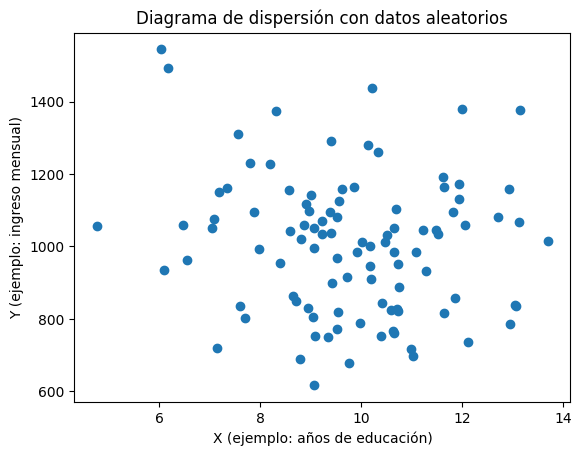

In [69]:
# Primer nivel con aleatorios


# Para que todos vean el mismo gráfico
np.random.seed(42)

# Generamos 100 observaciones
n = 100
x = np.random.normal(loc=10, scale=2, size=n)   # por ejemplo "años de educación"
y = np.random.normal(loc=1000, scale=200, size=n)  # por ejemplo "ingreso mensual"

plt.scatter(x, y)
plt.xlabel("X (ejemplo: años de educación)")
plt.ylabel("Y (ejemplo: ingreso mensual)")
plt.title("Diagrama de dispersión con datos aleatorios")
plt.show()


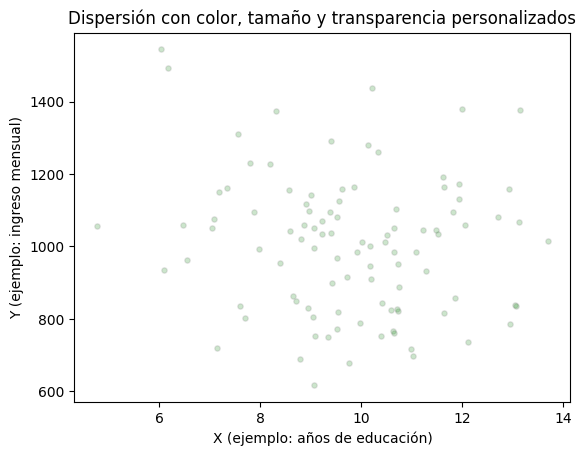

In [77]:
# Segundo nivel cambiar algunas cuestiones gráficas
# para saber estas cosas hay que ir y leer la documentación de las librerias , en este caso de matplotlib.pyplot
plt.scatter(x, y,
            color="green",    # color de los puntos
            s=15,             # tamaño (size)
            alpha=0.2,        # transparencia (0=transparente, 1=opaco)
            edgecolors="gray")  # borde del punto

plt.xlabel("X (ejemplo: años de educación)")
plt.ylabel("Y (ejemplo: ingreso mensual)")
plt.title("Dispersión con color, tamaño y transparencia personalizados")
plt.show()


In [ ]:
#imitación son su base de datos...


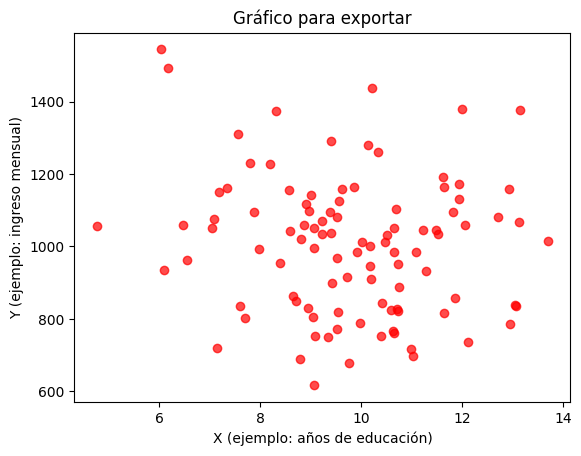

In [79]:
# Creamos de nuevo el gráfico (o el que quieras exportar)
plt.scatter(x, y, color="red", alpha=0.7)
plt.xlabel("X (ejemplo: años de educación)")
plt.ylabel("Y (ejemplo: ingreso mensual)")
plt.title("Gráfico para exportar")

# Guardar como PNG en Colab
plt.savefig("dispersión_ejemplo.png", dpi=300, bbox_inches="tight")
plt.show()


In [ ]:
#imitación son su base de datos...


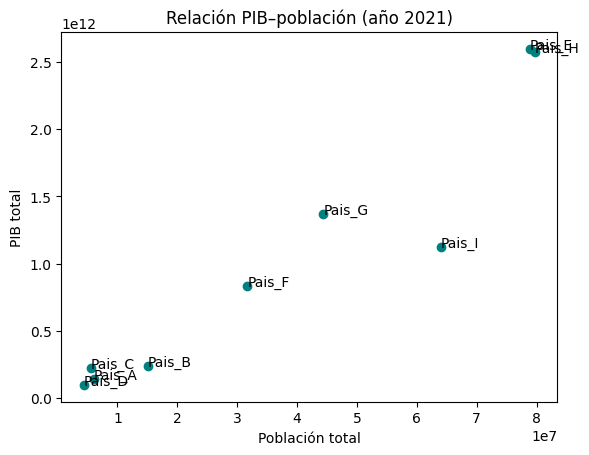

In [81]:


# Aseguararnos de que el archivo está en la misma carpeta de Colab

# Elegimos un año, por ejemplo 2021
df_2021 = df_xls[df_xls["year"] == 2021]

plt.scatter(df_2021["poblacion"], df_2021["gdp"], color="teal")

for _, fila in df_2021.iterrows():
    plt.text(fila["poblacion"], fila["gdp"], fila["País"])

plt.xlabel("Población total")
plt.ylabel("PIB total")
plt.title("Relación PIB–población (año 2021)")
plt.show()


In [ ]:
#imitación son su base de datos...


## Actividad 07 Graficos de Barras

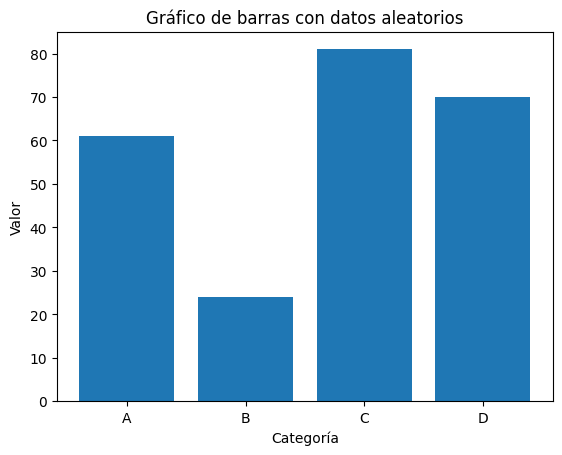

In [82]:


np.random.seed(42)

categorias = ["A", "B", "C", "D"]
valores = np.random.randint(10, 100, size=len(categorias))

plt.bar(categorias, valores)
plt.xlabel("Categoría")
plt.ylabel("Valor")
plt.title("Gráfico de barras con datos aleatorios")
plt.show()


In [ ]:
#imitación son su base de datos...


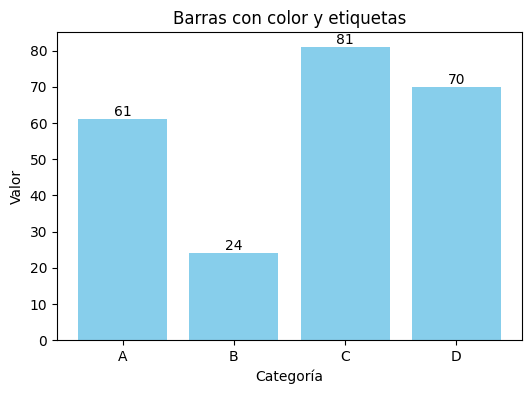

In [83]:
plt.figure(figsize=(6, 4))

barras = plt.bar(categorias, valores, color="skyblue")

plt.xlabel("Categoría")
plt.ylabel("Valor")
plt.title("Barras con color y etiquetas")

# Añadir el valor encima de cada barra
for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width() / 2,
             altura,
             f"{altura}",
             ha="center", va="bottom")

plt.show()


In [ ]:
#imitación son su base de datos...


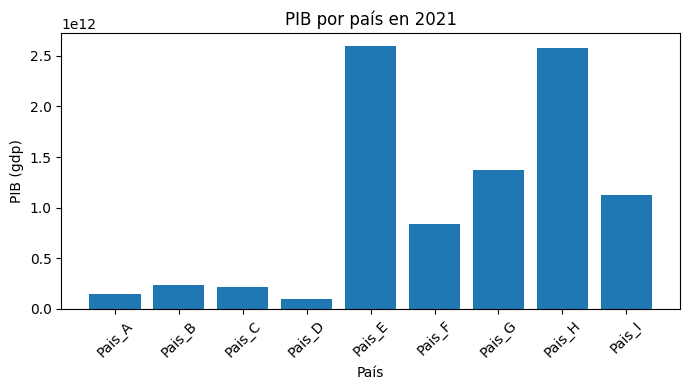

In [84]:
import matplotlib.pyplot as plt

# Elegimos un año, por ejemplo 2021
df_2021 = df_xls[df_xls["year"] == 2021]

plt.figure(figsize=(7, 4))
plt.bar(df_2021["País"], df_2021["gdp"])

plt.xlabel("País")
plt.ylabel("PIB (gdp)")
plt.title("PIB por país en 2021")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
#imitación son su base de datos...


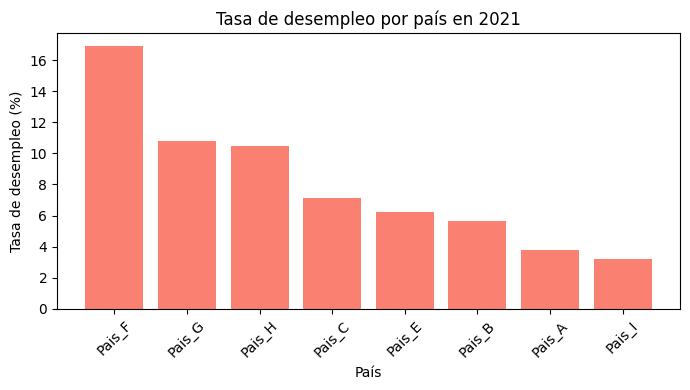

In [85]:
# Usamos el mismo año 2021
df_desemp = df_xls[df_xls["year"] == 2021].copy()

# Ordenamos de mayor a menor tasa de desempleo
df_desemp = df_desemp.sort_values("tasa_desempleo", ascending=False)

plt.figure(figsize=(7, 4))
plt.bar(df_desemp["País"], df_desemp["tasa_desempleo"], color="salmon")

plt.xlabel("País")
plt.ylabel("Tasa de desempleo (%)")
plt.title("Tasa de desempleo por país en 2021")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Actividad 8 Gráfico de Lineas

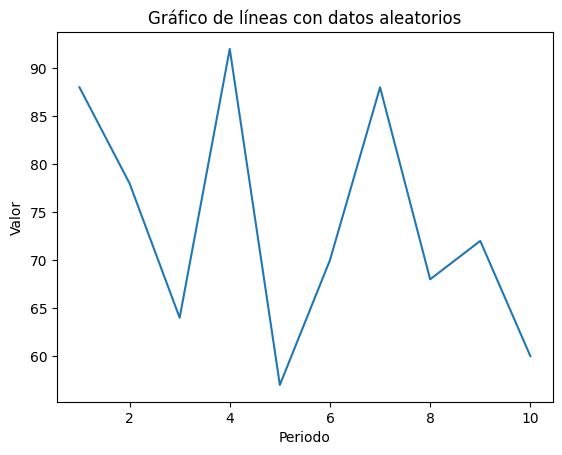

In [86]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Eje X: por ejemplo, años ficticios
x = np.arange(1, 11)  # 1 a 10
y = np.random.randint(50, 100, size=len(x))

plt.plot(x, y)
plt.xlabel("Periodo")
plt.ylabel("Valor")
plt.title("Gráfico de líneas con datos aleatorios")
plt.show()


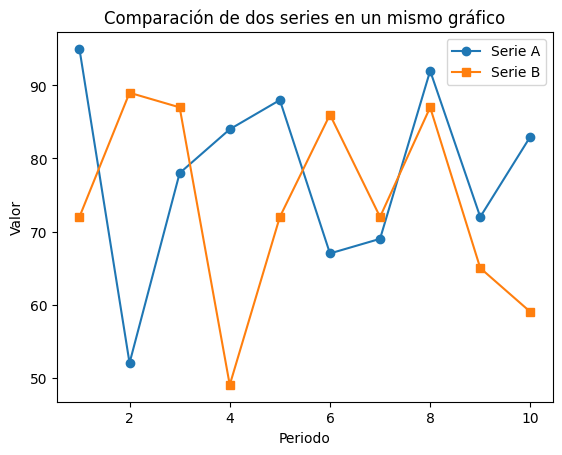

In [87]:
np.random.seed(123)

x = np.arange(1, 11)

serie_A = np.random.randint(50, 100, size=len(x))
serie_B = np.random.randint(40, 90, size=len(x))

plt.plot(x, serie_A, marker="o", label="Serie A")
plt.plot(x, serie_B, marker="s", label="Serie B")

plt.xlabel("Periodo")
plt.ylabel("Valor")
plt.title("Comparación de dos series en un mismo gráfico")
plt.legend()
plt.show()


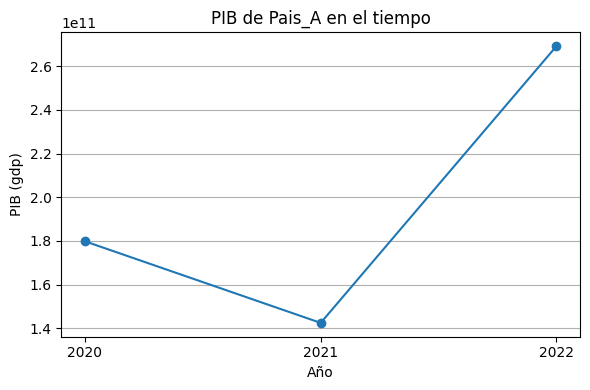

In [90]:


pais_ejemplo = "Pais_A"

df_pais = df_xls[df_xls["País"] == pais_ejemplo].sort_values("year").copy()
df_pais["year"] = df_pais["year"].astype(int)   # aseguramos años enteros

fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(df_pais["year"], df_pais["gdp"], marker="o")

#  fijar manualmente las marcas del eje X
ax.set_xticks(df_pais["year"])

ax.set_xlabel("Año")
ax.set_ylabel("PIB (gdp)")
ax.set_title(f"PIB de {pais_ejemplo} en el tiempo")
ax.grid(True, axis="y")

plt.tight_layout()
plt.show()


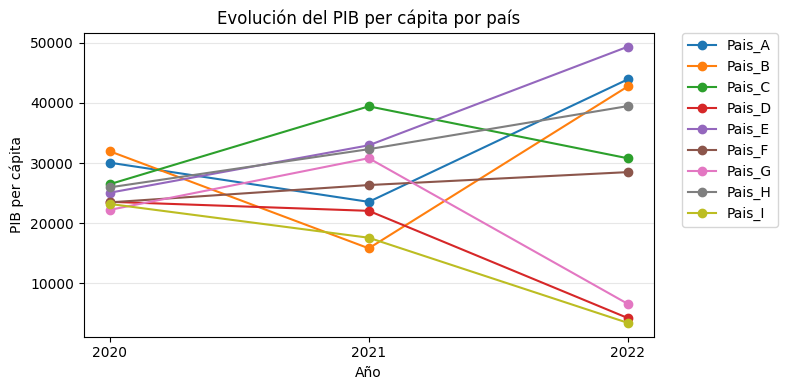

In [93]:


fig, ax = plt.subplots(figsize=(8, 4))

# Años como enteros y en orden
years = sorted(df_xls["year"].unique())

for pais in df_xls["País"].unique():
    df_tmp = df_xls[df_xls["País"] == pais].sort_values("year")
    ax.plot(
        df_tmp["year"].astype(int),
        df_tmp["pib_pc"],
        marker="o",
        linewidth=1.5,
        label=pais
    )

# clave: solo ticks en los años reales
ax.set_xticks(years)
ax.set_xlim(min(years) - 0.1, max(years) + 0.1)

ax.set_xlabel("Año")
ax.set_ylabel("PIB per cápita")
ax.set_title("Evolución del PIB per cápita por país")
ax.grid(axis="y", alpha=0.3)

# Mover la leyenda fuera para que no tape el gráfico
ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.)

plt.tight_layout()
plt.show()



## Actividad 9 Pistas para el reto

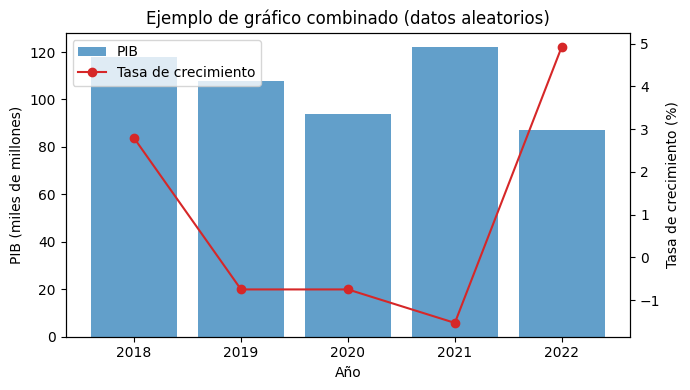

In [96]:
import numpy as np   #Ya la habíamos importado, pero les recuerdo.
import matplotlib.pyplot as plt    #Ya la habíamos importado, pero les recuerdo.

np.random.seed(42)

anios = np.array([2018, 2019, 2020, 2021, 2022])

# Supongamos que esto es "PIB" en miles de millones
pib = np.random.randint(80, 130, size=len(anios))

# Y esto una tasa de crecimiento en porcentaje
tasa_crec = np.random.uniform(-2, 6, size=len(anios))

fig, ax1 = plt.subplots(figsize=(7, 4))

# Barras para el PIB
ax1.bar(anios, pib, alpha=0.7, label="PIB")
ax1.set_xlabel("Año")
ax1.set_ylabel("PIB (miles de millones)")
ax1.set_xticks(anios)

# Segundo eje para la tasa de crecimiento
ax2 = ax1.twinx()
ax2.plot(anios, tasa_crec, color="tab:red", marker="o", label="Tasa de crecimiento")
ax2.set_ylabel("Tasa de crecimiento (%)")

plt.title("Ejemplo de gráfico combinado (datos aleatorios)")

# Combinar leyendas de ambos ejes
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax2.legend(h1 + h2, l1 + l2, loc="upper left")

fig.tight_layout()
plt.show()


Actividad 10 – Mini-reto: gráfico combinado (barra + línea)

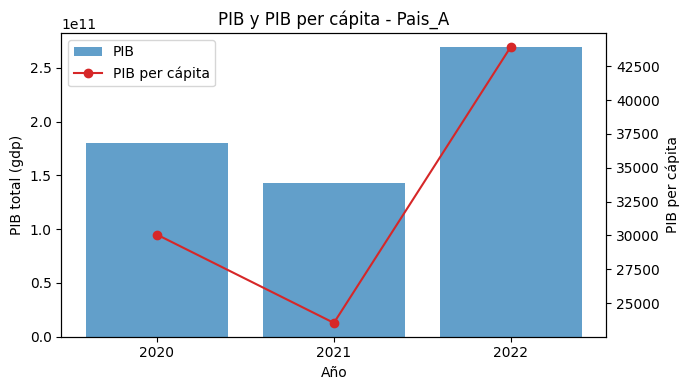

In [98]:


# 1. Elegir el país de interés
pais_objetivo = "Pais_A"   # TODO: permitir que el usuario cambie el país

# 2. Filtrar los datos y ordenarlos por año
df_pais = df_xls[df_xls["País"] == pais_objetivo].sort_values("year").copy()
df_pais["year"] = df_pais["year"].astype(int)

anios = df_pais["year"]

fig, ax1 = plt.subplots(figsize=(7, 4))

# 3. Barras para el PIB (gdp)
ax1.bar(anios, df_pais["gdp"], alpha=0.7, label="PIB")
ax1.set_xlabel("Año")
ax1.set_ylabel("PIB total (gdp)")
ax1.set_xticks(anios)

# 4. Línea para el PIB per cápita (segundo eje)
ax2 = ax1.twinx()

# TODO: completar esta línea con la serie adecuada (pib_pc)
ax2.plot(
    anios,
    df_pais["pib_pc"],      # <- aquí va la variable
    color="tab:red",
    marker="o",
    label="PIB per cápita"
)

ax2.set_ylabel("PIB per cápita")

plt.title(f"PIB y PIB per cápita - {pais_objetivo}")

# 5. Combinar leyendas de ambos ejes
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax2.legend(h1 + h2, l1 + l2, loc="upper left")

fig.tight_layout()
plt.show()
